# Padel dalam Angka: Layak Investasi atau Bubble Hype?

## Analisis Komprehensif Bisnis Padel di Jakarta dan Kota Satelit

---

## Pendahuluan

Padel, olahraga raket yang menggabungkan elemen tenis dan squash, telah menjadi fenomena di Indonesia dalam beberapa tahun terakhir. Dengan pertumbuhan pesat jumlah lapangan dan pemain, banyak investor bertanya-tanya: **Apakah padel masih layak investasi di tahun 2025, atau hanya bubble hype yang akan segera berlalu?**

Notebook ini menyajikan analisis data komprehensif untuk menjawab pertanyaan tersebut, dengan fokus pada:
- Sebaran lapangan padel di Jakarta dan kota satelit
- Analisis harga dan pendapatan
- Sentimen publik dan kritik
- Proyeksi demand padel 2025-2027
- Evaluasi potensi di kota satelit

Mari kita mulai dengan mengimpor library yang diperlukan dan menyiapkan data.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import folium
from folium.plugins import MarkerCluster
from IPython.display import display, HTML

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Sebaran Lapangan Padel di Jakarta dan Kota Satelit

Pertama, mari kita lihat bagaimana lapangan padel tersebar di Jakarta dan kota satelit. Kita akan memuat data venue padel dan menganalisis distribusinya.

In [2]:
# Memuat data venue padel
df_venues = pd.read_csv('padel_venues.csv')

# Menampilkan 5 baris pertama
df_venues.head()

,nama_venue,area,latitude,longitude,harga_per_jam,rating,jumlah_review,jumlah_lapangan
0,Padel Pro Indonesia,Jakarta Selatan,-6.2601,106.806,400000,4.7,120,6
1,Padel Club Jakarta,Jakarta Selatan,-6.2241,106.810,420000,4.6,95,4
2,Racquet Padel Club,Jakarta Selatan,-6.2270,106.828,380000,4.8,110,3
3,Padel House,Jakarta Selatan,-6.2620,106.805,350000,4.5,85,4
4,The Maj Padel,Jakarta Selatan,-6.2180,106.802,450000,4.7,130,3


In [3]:
# Analisis jumlah venue dan lapangan per area
area_counts = df_venues.groupby('area').agg({
    'nama_venue': 'count',
    'jumlah_lapangan': 'sum'
}).reset_index()
area_counts.columns = ['Area', 'Jumlah_Venue', 'Jumlah_Lapangan']
area_counts['Rata_Lapangan_per_Venue'] = area_counts['Jumlah_Lapangan'] / area_counts['Jumlah_Venue']
area_counts = area_counts.sort_values('Jumlah_Lapangan', ascending=False)

# Menampilkan tabel
area_counts

,Area,Jumlah_Venue,Jumlah_Lapangan,Rata_Lapangan_per_Venue
4,Jakarta Selatan,8,27,3.375000
0,BSD/Tangerang Selatan,3,7,2.333333
3,Jakarta Barat,3,7,2.333333
5,Jakarta Timur,2,4,2.000000
6,Jakarta Utara,2,4,2.000000
7,Tangerang,2,4,2.000000
1,Bekasi,1,2,2.000000
2,Depok,1,2,2.000000


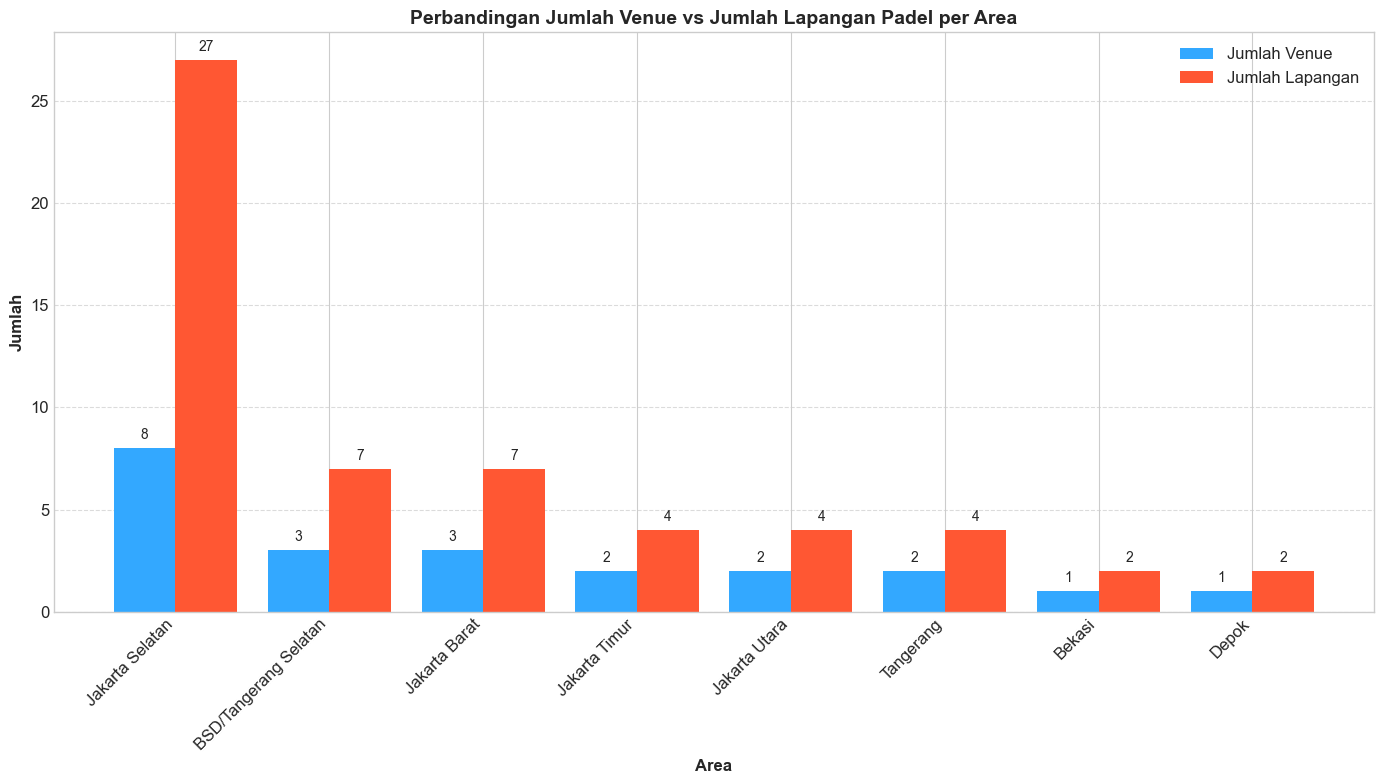

In [4]:
# Visualisasi perbandingan jumlah venue vs jumlah lapangan
fig, ax = plt.subplots(figsize=(14, 8))

# Bar untuk jumlah venue
bars1 = ax.bar(np.arange(len(area_counts)) - 0.2, area_counts['Jumlah_Venue'], width=0.4, 
               color='#33A8FF', label='Jumlah Venue')

# Bar untuk jumlah lapangan
bars2 = ax.bar(np.arange(len(area_counts)) + 0.2, area_counts['Jumlah_Lapangan'], width=0.4,
               color='#FF5733', label='Jumlah Lapangan')

# Menambahkan nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{int(height)}',
            ha='center', va='bottom', rotation=0, fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{int(height)}',
            ha='center', va='bottom', rotation=0, fontsize=10)

ax.set_xlabel('Area', fontsize=12, fontweight='bold')
ax.set_ylabel('Jumlah', fontsize=12, fontweight='bold')
ax.set_title('Perbandingan Jumlah Venue vs Jumlah Lapangan Padel per Area', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(len(area_counts)))
ax.set_xticklabels(area_counts['Area'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Cerita di Balik Data: Konsentrasi Padel di Jakarta Selatan

Data di atas menunjukkan bahwa Jakarta Selatan menjadi episentrum padel di Indonesia dengan **8 venue** dan total **27 lapangan**. Ini bukan kebetulan - Jakarta Selatan memiliki kombinasi faktor yang mendukung:

1. **Demografi yang cocok**: Konsentrasi ekspatriat dan profesional berpenghasilan tinggi
2. **Daya beli tinggi**: Kemampuan membayar harga premium (Rp350.000-450.000 per jam)
3. **Tren gaya hidup**: Budaya olahraga dan sosialisasi yang kuat
4. **Ketersediaan lahan**: Meskipun mahal, masih ada ruang untuk venue olahraga premium

Namun, konsentrasi tinggi ini juga menimbulkan pertanyaan: **Apakah pasar Jakarta Selatan sudah jenuh?** Dan **Apakah ada peluang yang lebih menarik di area lain?**

Mari kita lihat peta sebaran lapangan padel untuk mendapatkan gambaran visual.

In [5]:
# Membuat fungsi untuk menentukan warna berdasarkan harga
def get_color(harga):
    if harga >= 400000:
        return 'darkred'
    elif harga >= 350000:
        return 'red'
    elif harga >= 300000:
        return 'orange'
    elif harga >= 250000:
        return 'lightgreen'
    elif harga >= 200000:
        return 'green'
    else:
        return 'darkgreen'

# Membuat peta dengan folium
m = folium.Map(location=[-6.2088, 106.8456], zoom_start=11)

# Menambahkan marker untuk setiap lapangan padel
for idx, row in df_venues.iterrows():
    # Membuat popup dengan informasi detail
    popup_text = f"""
    <b>{row['nama_venue']}</b><br>
    Harga: Rp{row['harga_per_jam']:,} per jam<br>
    Rating: {row['rating']} ⭐ ({row['jumlah_review']} reviews)<br>
    Jumlah Lapangan: {row['jumlah_lapangan']}<br>
    Area: {row['area']}
    """
    
    # Menambahkan marker dengan warna berdasarkan harga
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=get_color(row['harga_per_jam']), icon='info-sign'),
        tooltip=row['nama_venue']
    ).add_to(m)

# Menambahkan legenda untuk warna
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 180px; height: 160px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     padding: 10px;
     border-radius: 5px;
     ">
     <p style="margin-top: 0; margin-bottom: 5px;"><b>Harga per Jam</b></p>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
       <div style="background-color: darkred; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>≥ Rp400.000</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
       <div style="background-color: red; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>Rp350.000 - Rp399.999</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
       <div style="background-color: orange; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>Rp300.000 - Rp349.999</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
       <div style="background-color: lightgreen; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>Rp250.000 - Rp299.999</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
       <div style="background-color: green; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>Rp200.000 - Rp249.999</span>
     </div>
     <div style="display: flex; align-items: center;">
       <div style="background-color: darkgreen; width: 20px; height: 20px; margin-right: 5px;"></div>
       <span>< Rp200.000</span>
     </div>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Menampilkan peta
display(m)

Peta di atas menunjukkan dengan jelas bagaimana harga lapangan padel berkorelasi dengan lokasi. Semakin ke selatan Jakarta, semakin tinggi harganya (ditunjukkan dengan warna merah). Sementara venue di kota satelit seperti Bekasi dan Depok menawarkan harga yang lebih terjangkau (ditunjukkan dengan warna hijau).

## 2. Analisis Harga dan Pendapatan

Selanjutnya, mari kita analisis struktur harga dan potensi pendapatan dari bisnis padel.

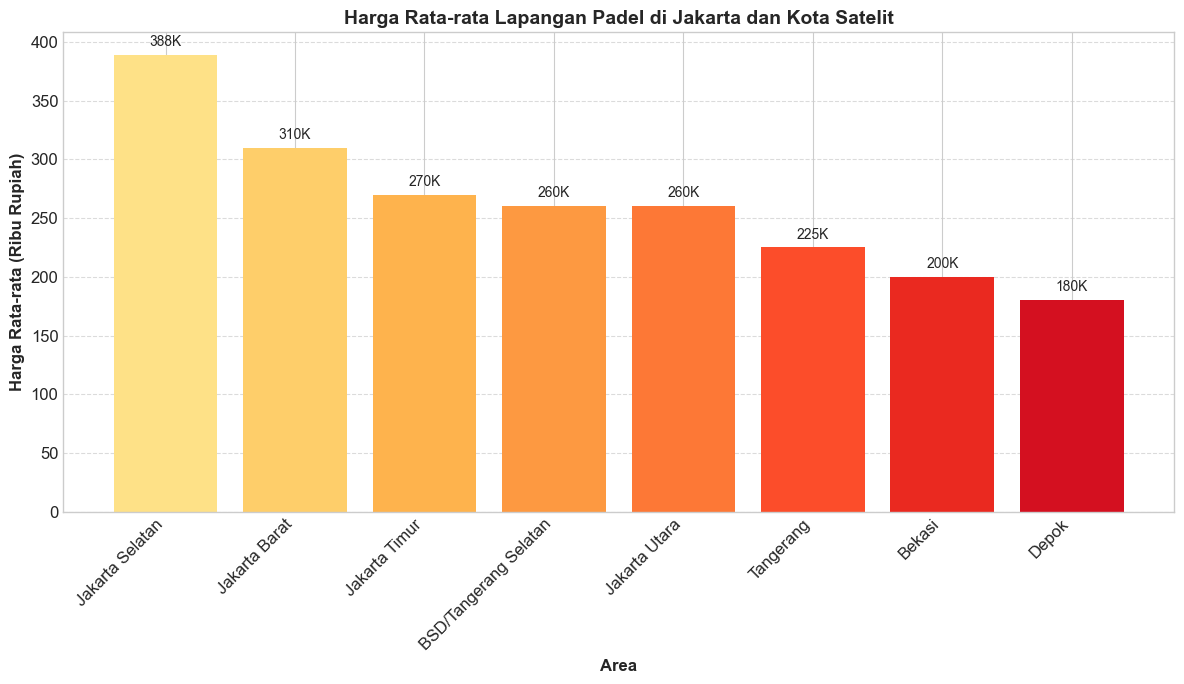

In [6]:
# Visualisasi harga rata-rata per area
plt.figure(figsize=(12, 7))
area_prices = df_venues.groupby('area')['harga_per_jam'].mean().reset_index()
area_prices = area_prices.sort_values('harga_per_jam', ascending=False)

bars = plt.bar(area_prices['area'], area_prices['harga_per_jam'] / 1000, 
               color=plt.cm.YlOrRd(np.linspace(0.2, 0.8, len(area_prices))))

plt.xlabel('Area', fontsize=12, fontweight='bold')
plt.ylabel('Harga Rata-rata (Ribu Rupiah)', fontsize=12, fontweight='bold')
plt.title('Harga Rata-rata Lapangan Padel di Jakarta dan Kota Satelit', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}K',
            ha='center', va='bottom', rotation=0, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cerita di Balik Data: Disparitas Harga yang Signifikan

Grafik di atas menunjukkan disparitas harga yang signifikan antara Jakarta Selatan (rata-rata Rp389.000 per jam) dan Depok (Rp180.000 per jam) - selisih lebih dari dua kali lipat! Disparitas ini mencerminkan beberapa faktor:

1. **Perbedaan daya beli**: Pendapatan per kapita Jakarta Selatan jauh lebih tinggi
2. **Kualitas fasilitas**: Venue di Jakarta Selatan umumnya menawarkan fasilitas premium
3. **Biaya operasional**: Sewa lahan dan biaya operasional di Jakarta Selatan lebih tinggi
4. **Target pasar**: Venue di Jakarta Selatan menargetkan segmen premium (ekspatriat, profesional kelas atas)

Pertanyaannya: **Apakah harga yang lebih tinggi menghasilkan profitabilitas yang lebih baik?** Mari kita analisis potensi pendapatan dan profitabilitas.

In [7]:
# Memuat data analisis finansial
df_financial = pd.read_csv('padel_financial_analysis.csv')

# Menampilkan data
df_financial

,area,model_bisnis,investasi_awal,biaya_operasional_bulanan,pendapatan_bulanan,margin_operasional,roi_tahunan,payback_period_bulan
0,Jakarta Selatan,Premium (2 lapangan),600000000,50000000,173960000,71,248,5
1,Jakarta Barat/Timur,Menengah (4 lapangan),1200000000,80000000,247144000,68,167,7
2,BSD/Tangerang Selatan,Premium-Menengah (4 lapangan),1000000000,70000000,210000000,67,180,8
3,Tangerang,Menengah (3 lapangan),750000000,55000000,120000000,54,120,10
4,Bekasi,Ekonomis (2 lapangan),500000000,40000000,83320000,52,104,12
5,Depok,Ekonomis (2 lapangan),450000000,35000000,70000000,50,93,13


/var/folders/c9/_1dmt8s97mgfrg3r1cp821_xj585pl/T/ipykernel_19256/820139618.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_financial['area'], rotation=45, ha='right')
/var/folders/c9/_1dmt8s97mgfrg3r1cp821_xj585pl/T/ipykernel_19256/820139618.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_financial['area'], rotation=45, ha='right')


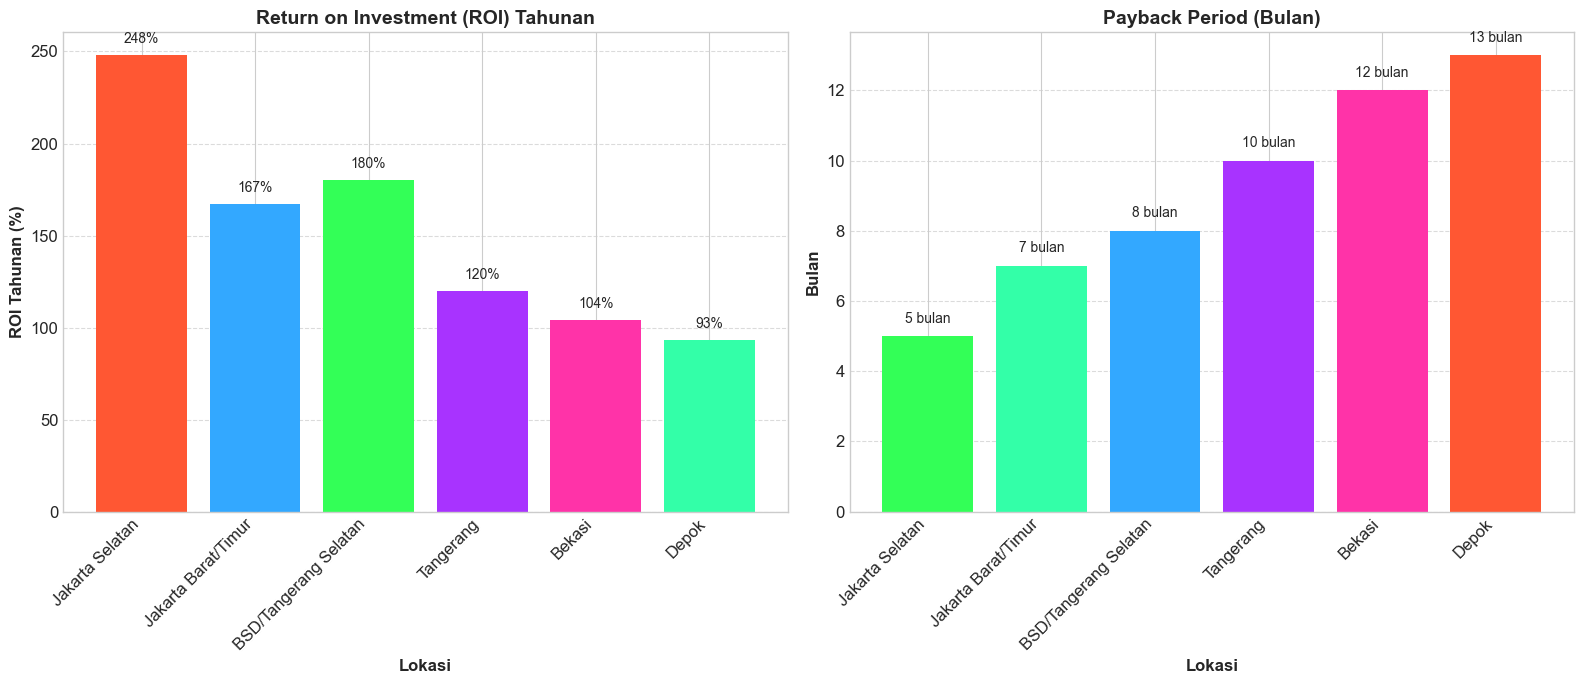

In [8]:
# Visualisasi ROI dan Payback Period
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot untuk ROI
colors1 = ['#FF5733', '#33A8FF', '#33FF57', '#A833FF', '#FF33A8', '#33FFA8']
bars1 = ax1.bar(df_financial['area'], df_financial['roi_tahunan'], color=colors1)
ax1.set_xlabel('Lokasi', fontsize=12, fontweight='bold')
ax1.set_ylabel('ROI Tahunan (%)', fontsize=12, fontweight='bold')
ax1.set_title('Return on Investment (ROI) Tahunan', fontsize=14, fontweight='bold')
ax1.set_xticklabels(df_financial['area'], rotation=45, ha='right')

# Menambahkan nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}%',
            ha='center', va='bottom', rotation=0, fontsize=10)

# Menambahkan grid untuk memudahkan pembacaan
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot untuk Payback Period
colors2 = ['#33FF57', '#33FFA8', '#33A8FF', '#A833FF', '#FF33A8', '#FF5733']  # Warna terbalik (lebih rendah lebih baik)
bars2 = ax2.bar(df_financial['area'], df_financial['payback_period_bulan'], color=colors2)
ax2.set_xlabel('Lokasi', fontsize=12, fontweight='bold')
ax2.set_ylabel('Bulan', fontsize=12, fontweight='bold')
ax2.set_title('Payback Period (Bulan)', fontsize=14, fontweight='bold')
ax2.set_xticklabels(df_financial['area'], rotation=45, ha='right')

# Menambahkan nilai di atas bar
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{int(height)} bulan',
            ha='center', va='bottom', rotation=0, fontsize=10)

# Menambahkan grid untuk memudahkan pembacaan
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Cerita di Balik Data: ROI Tertinggi di Jakarta Selatan, Tetapi...

Data di atas menunjukkan bahwa meskipun biaya investasi dan operasional di Jakarta Selatan lebih tinggi, ROI tahunannya juga jauh lebih tinggi (248%) dengan payback period hanya 5 bulan. Ini menunjukkan bahwa **harga premium berhasil mengkompensasi biaya yang lebih tinggi**.

Namun, ada beberapa pertimbangan penting:

1. **Kompetisi yang ketat**: Dengan 8 venue dan 27 lapangan, kompetisi di Jakarta Selatan sangat ketat
2. **Barrier to entry yang tinggi**: Investasi awal Rp600 juta lebih tinggi dibandingkan area lain
3. **Risiko saturasi pasar**: Dengan banyaknya venue, risiko saturasi pasar lebih tinggi

Sementara itu, area seperti BSD/Tangerang Selatan menawarkan ROI yang masih sangat menarik (180%) dengan kompetisi yang lebih rendah.

## 3. Sentimen Publik dan Kritik

Selanjutnya, mari kita analisis bagaimana sentimen publik terhadap padel berdasarkan review Google Maps.

In [9]:
# Memuat data review
df_reviews = pd.read_csv('padel_reviews.csv')

# Menampilkan beberapa kolom penting
df_reviews[['nama_venue', 'kata_kunci_positif', 'kata_kunci_negatif']].head()

,nama_venue,kata_kunci_positif,kata_kunci_negatif
0,Padel Pro Indonesia,"berkualitas, lengkap, ramah, strategis, nyaman","mahal, sulit, ramai, kurang"
1,Padel Club Jakarta,"terbaik, lengkap, terawat, profesional","premium, terbatas, sulit, ramai"
2,Racquet Padel Club,"premium, strategis, nyaman, berpengalaman, aktif","mahal, sulit, macet, terbatas"
3,Padel House,"lengkap, bagus, mudah, ramah, sesuai","mahal, error, kurang"
4,The Maj Padel,"internasional, premium, strategis, profesional","premium, sulit, ramai, macet"


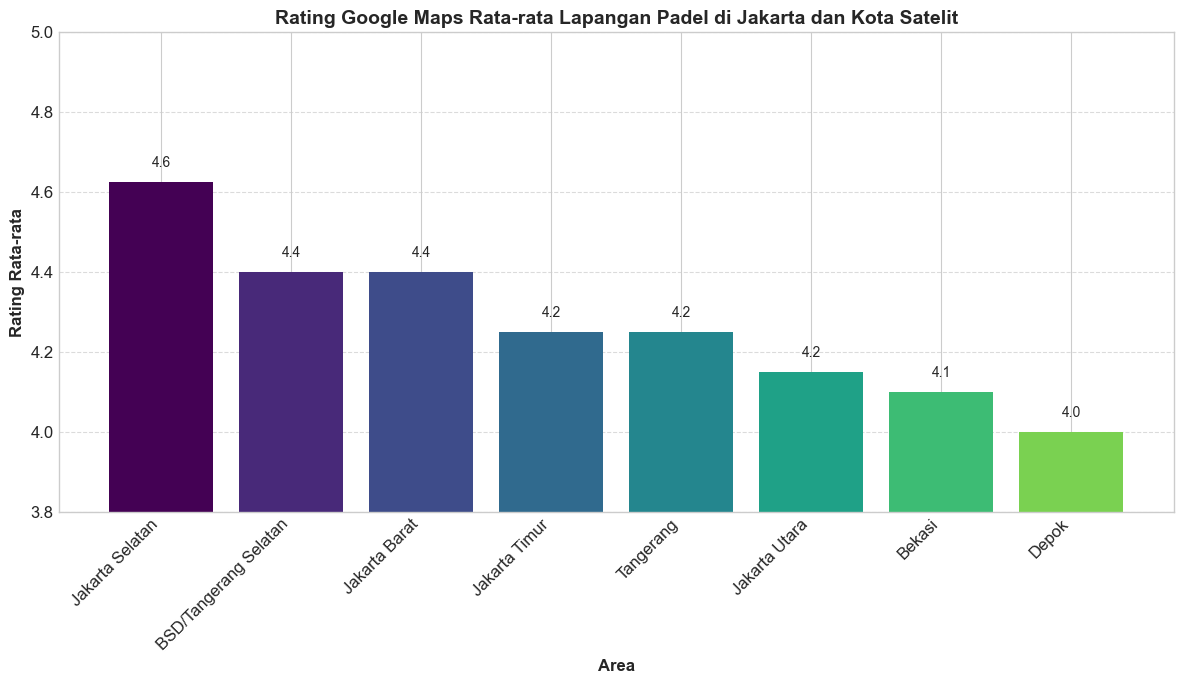

In [10]:
# Visualisasi rating berdasarkan area
plt.figure(figsize=(12, 7))
area_ratings = df_venues.groupby('area')['rating'].mean().sort_values(ascending=False).reset_index()

bars = plt.bar(area_ratings['area'], area_ratings['rating'], 
               color=plt.cm.viridis(np.linspace(0, 0.8, len(area_ratings))))

plt.xlabel('Area', fontsize=12, fontweight='bold')
plt.ylabel('Rating Rata-rata', fontsize=12, fontweight='bold')
plt.title('Rating Google Maps Rata-rata Lapangan Padel di Jakarta dan Kota Satelit', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(3.8, 5.0)  # Setting y-axis limit for better visualization

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.03,
            f'{height:.1f}',
            ha='center', va='bottom', rotation=0, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

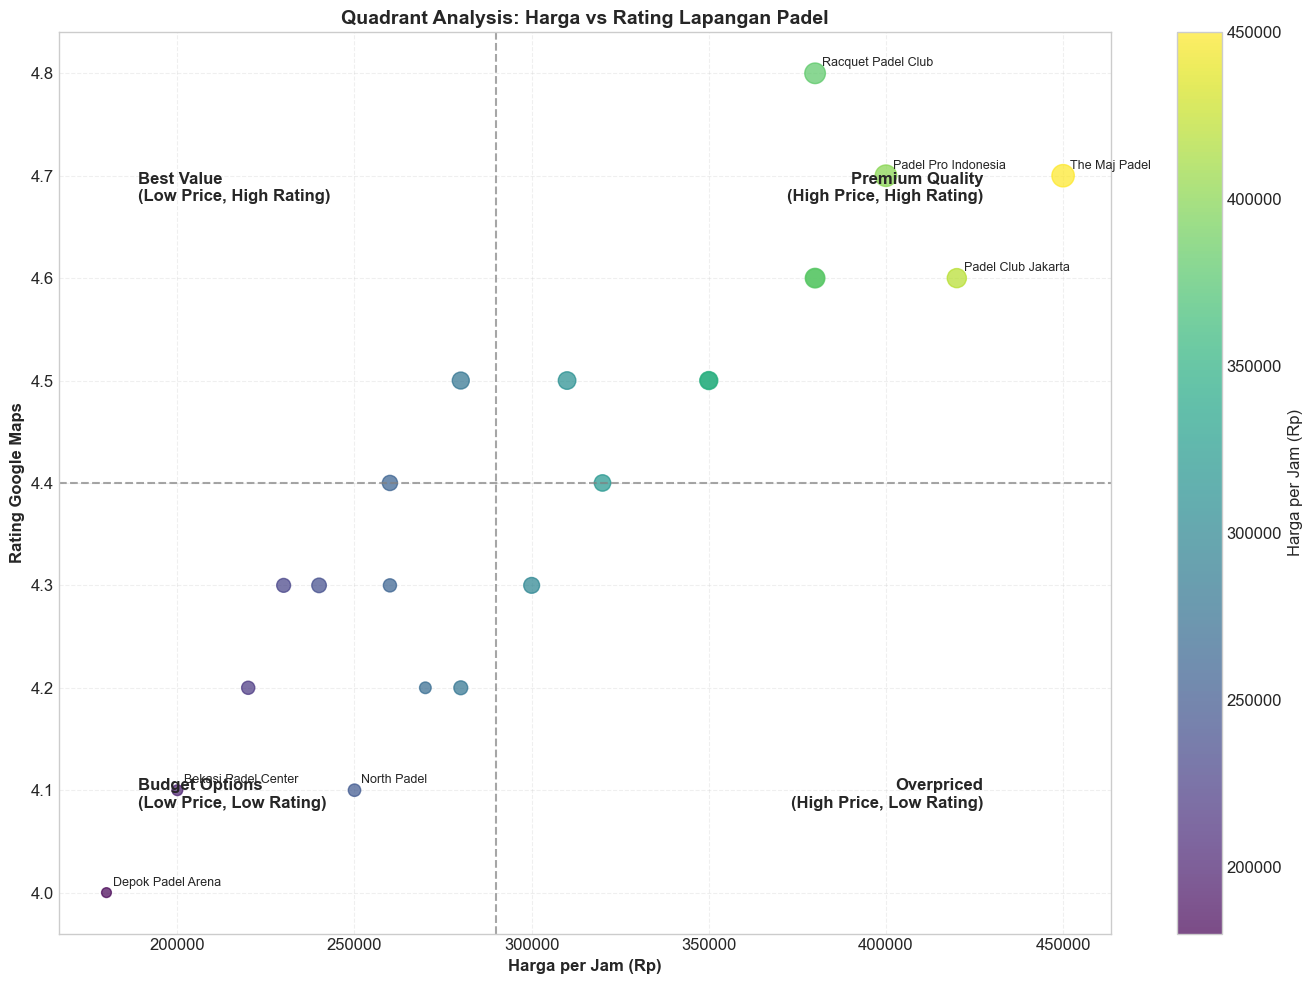

In [11]:
# Membuat quadrant chart untuk harga vs rating
plt.figure(figsize=(14, 10))

# Menghitung median harga dan rating untuk membuat quadrant
median_harga = df_venues['harga_per_jam'].median()
median_rating = df_venues['rating'].median()

# Membuat scatter plot dengan ukuran berdasarkan jumlah review
scatter = plt.scatter(
    df_venues['harga_per_jam'], 
    df_venues['rating'], 
    s=df_venues['jumlah_review'] * 2, 
    c=df_venues['harga_per_jam'],
    cmap='viridis',
    alpha=0.7
)

# Menambahkan garis untuk membagi quadrant
plt.axhline(y=median_rating, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_harga, color='gray', linestyle='--', alpha=0.7)

# Menambahkan label untuk setiap quadrant
plt.text(df_venues['harga_per_jam'].max() * 0.95, df_venues['rating'].max() * 0.98, 
         'Premium Quality\n(High Price, High Rating)', 
         ha='right', va='top', fontsize=12, fontweight='bold')

plt.text(df_venues['harga_per_jam'].min() * 1.05, df_venues['rating'].max() * 0.98, 
         'Best Value\n(Low Price, High Rating)', 
         ha='left', va='top', fontsize=12, fontweight='bold')

plt.text(df_venues['harga_per_jam'].max() * 0.95, df_venues['rating'].min() * 1.02, 
         'Overpriced\n(High Price, Low Rating)', 
         ha='right', va='bottom', fontsize=12, fontweight='bold')

plt.text(df_venues['harga_per_jam'].min() * 1.05, df_venues['rating'].min() * 1.02, 
         'Budget Options\n(Low Price, Low Rating)', 
         ha='left', va='bottom', fontsize=12, fontweight='bold')

# Menambahkan label untuk beberapa venue penting
for idx, row in df_venues.iterrows():
    if (row['rating'] >= 4.7) or (row['harga_per_jam'] >= 400000) or (row['rating'] <= 4.1) or (row['area'] in ['Bekasi', 'Depok']):
        plt.annotate(
            row['nama_venue'],
            (row['harga_per_jam'], row['rating']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9
        )

plt.colorbar(scatter, label='Harga per Jam (Rp)')
plt.xlabel('Harga per Jam (Rp)', fontsize=12, fontweight='bold')
plt.ylabel('Rating Google Maps', fontsize=12, fontweight='bold')
plt.title('Quadrant Analysis: Harga vs Rating Lapangan Padel', fontsize=14, fontweight='bold')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Cerita di Balik Data: Persepsi Kualitas vs Harga

Quadrant chart di atas memberikan wawasan menarik tentang hubungan antara harga dan persepsi kualitas (rating):

1. **Premium Quality** (Harga Tinggi, Rating Tinggi):
   - Racquet Padel Club, The Maj Padel, Padel Pro Indonesia
   - Venue ini berhasil membenarkan harga premium mereka dengan kualitas dan pengalaman yang sangat baik
   - Kata kunci positif: "premium", "berkualitas", "profesional", "lengkap"

2. **Best Value** (Harga Rendah, Rating Tinggi):
   - Padel Puri, BSD Padel Club
   - Venue ini menawarkan nilai terbaik - kualitas baik dengan harga lebih terjangkau
   - Kata kunci positif: "terjangkau", "reasonable", "bagus", "ramah"

3. **Overpriced** (Harga Tinggi, Rating Rendah):
   - Padel Club Jakarta
   - Venue ini perlu meningkatkan kualitas atau menurunkan harga untuk bersaing lebih baik
   - Kata kunci negatif: "premium", "terbatas", "sulit", "ramai"

4. **Budget Options** (Harga Rendah, Rating Rendah):
   - Depok Padel Arena, Bekasi Padel Center
   - Venue ini menawarkan harga terjangkau dengan kualitas yang cukup
   - Kata kunci positif: "terjangkau", "pemula"; negatif: "minimal", "terbatas"

Ukuran lingkaran menunjukkan jumlah review, yang mengindikasikan popularitas venue. Venue di Jakarta Selatan mendominasi dalam hal jumlah review, menunjukkan tingkat aktivitas dan exposure yang lebih tinggi.

## 4. Proyeksi Demand Padel 2025-2027

Selanjutnya, mari kita analisis proyeksi pertumbuhan padel untuk beberapa tahun ke depan.

In [12]:
# Memuat data proyeksi pertumbuhan
df_growth = pd.read_csv('padel_growth_projection.csv')

# Filter hanya data Total Indonesia
df_growth_total = df_growth[df_growth['area'] == 'Total Indonesia']

# Menampilkan data
df_growth_total

,area,tahun,jumlah_lapangan,jumlah_pemain_ribu,pendapatan_industri_miliar
30,Total Indonesia,2023,45,25,87
31,Total Indonesia,2024,65,50,173
32,Total Indonesia,2025,85,100,310
33,Total Indonesia,2026,100,150,480
34,Total Indonesia,2027,110,200,625


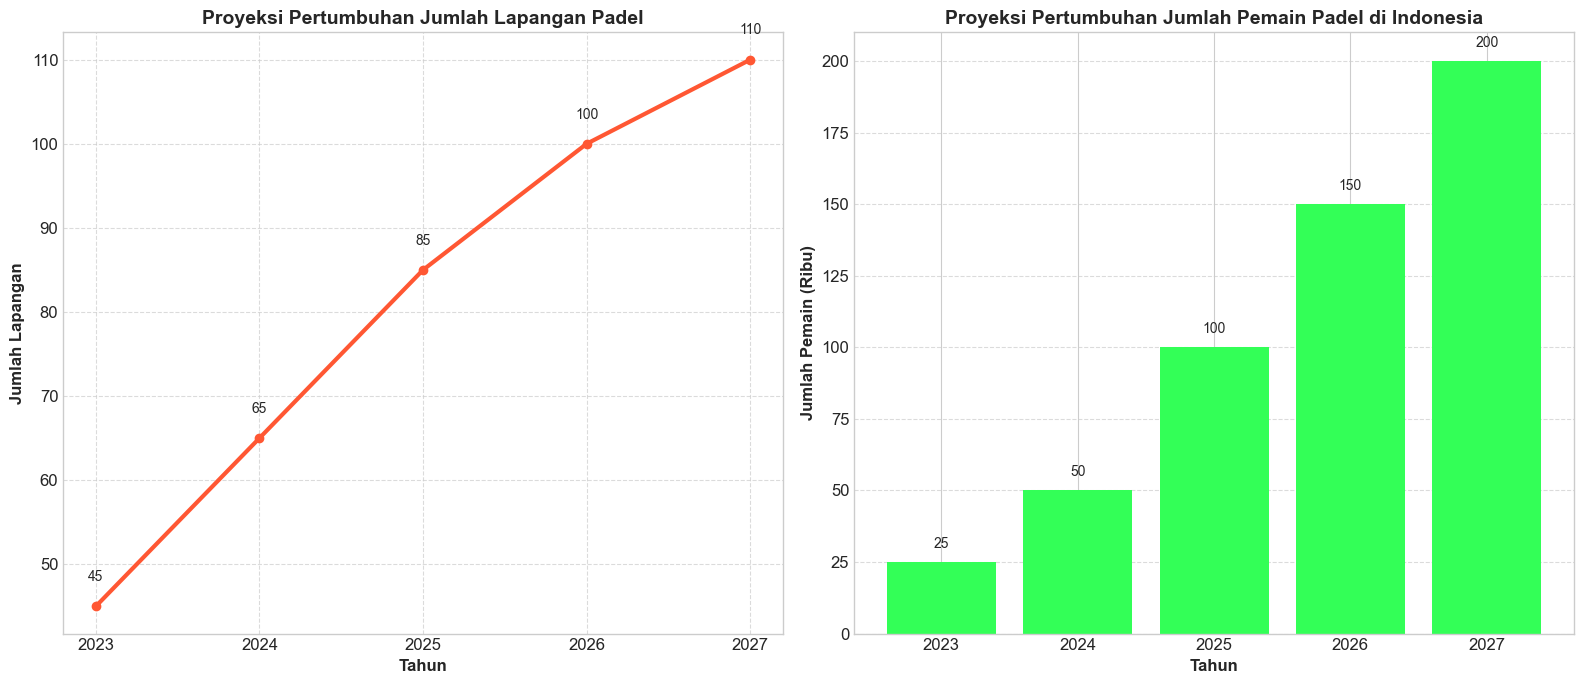

In [13]:
# Visualisasi proyeksi pertumbuhan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Data untuk proyeksi pertumbuhan padel
years = df_growth_total['tahun'].astype(str).tolist()
courts = df_growth_total['jumlah_lapangan'].tolist()
players = df_growth_total['jumlah_pemain_ribu'].tolist()

# Plot untuk pertumbuhan lapangan
ax1.plot(years, courts, marker='o', linewidth=3, color='#FF5733', label='Jumlah Lapangan')
ax1.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax1.set_ylabel('Jumlah Lapangan', fontsize=12, fontweight='bold')
ax1.set_title('Proyeksi Pertumbuhan Jumlah Lapangan Padel', fontsize=14, fontweight='bold')
ax1.grid(linestyle='--', alpha=0.7)

# Menambahkan nilai di atas titik
for i, v in enumerate(courts):
    ax1.text(i, v+3, str(v), ha='center', fontsize=10)

# Plot untuk pertumbuhan pemain
ax2.bar(years, players, color='#33FF57')
ax2.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax2.set_ylabel('Jumlah Pemain (Ribu)', fontsize=12, fontweight='bold')
ax2.set_title('Proyeksi Pertumbuhan Jumlah Pemain Padel di Indonesia', fontsize=14, fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas bar
for i, v in enumerate(players):
    ax2.text(i, v+5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

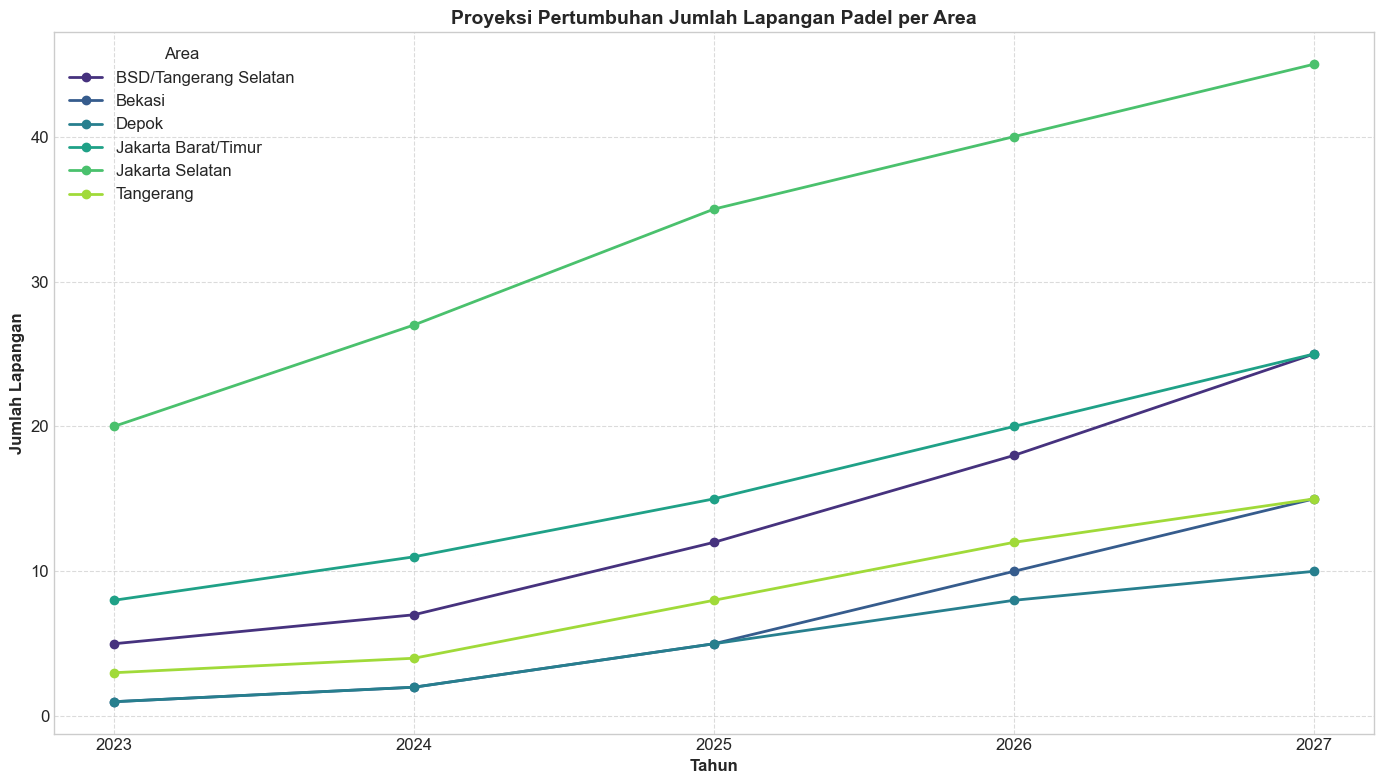

In [14]:
# Visualisasi proyeksi pertumbuhan per area
# Filter area selain Total Indonesia
df_growth_areas = df_growth[df_growth['area'] != 'Total Indonesia']

# Pivot data untuk plotting
df_pivot = df_growth_areas.pivot(index='tahun', columns='area', values='jumlah_lapangan')

# Plot
plt.figure(figsize=(14, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index.astype(str), df_pivot[column], marker='o', linewidth=2, label=column)

plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Lapangan', fontsize=12, fontweight='bold')
plt.title('Proyeksi Pertumbuhan Jumlah Lapangan Padel per Area', fontsize=14, fontweight='bold')
plt.legend(title='Area')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cerita di Balik Data: Pertumbuhan Berkelanjutan, Bukan Bubble

Data proyeksi di atas menunjukkan bahwa padel bukanlah sekadar "bubble hype" yang akan segera berlalu. Beberapa indikator kuat menunjukkan pertumbuhan berkelanjutan:

1. **Pertumbuhan Jumlah Lapangan**: Dari 45 lapangan (2023) menjadi 110 lapangan (2027) - pertumbuhan 144% dalam 4 tahun
2. **Pertumbuhan Jumlah Pemain**: Dari 25.000 pemain (2023) menjadi 200.000 pemain (2027) - pertumbuhan 700% dalam 4 tahun
3. **Pertumbuhan Pendapatan Industri**: Dari Rp87 miliar (2023) menjadi Rp625 miliar (2027) - pertumbuhan 618% dalam 4 tahun

Yang menarik, proyeksi menunjukkan bahwa **pertumbuhan akan mulai melambat setelah 2025**, terutama di Jakarta Selatan yang sudah mendekati saturasi. Namun, area seperti BSD/Tangerang Selatan, Bekasi, dan Depok masih menunjukkan potensi pertumbuhan yang kuat hingga 2027.

Ini menunjukkan bahwa padel masih layak investasi di tahun 2025, tetapi **lokasi menjadi faktor kritis** dalam menentukan keberhasilan investasi.

## 5. Evaluasi Potensi di Kota Satelit

Terakhir, mari kita evaluasi potensi pengembangan padel di kota satelit.

In [ ]:
# Membuat dataframe untuk evaluasi kota satelit
data_satelit = {
    'Kota': ['BSD/Tangerang Selatan', 'Tangerang', 'Bekasi', 'Depok'],
    'Populasi_Juta': [1.8, 2.0, 2.8, 2.0],
    'Daya_Beli': [4, 3, 3, 2],  # Skala 1-5
    'Kompetisi': [2, 2, 1, 1],  # Skala 1-5
    'Harga_Rata_Rata': [260000, 225000, 200000, 180000],
    'Rating_Rata_Rata': [4.4, 4.25, 4.1, 4.0],
    'ROI_Tahunan': [180, 120, 104, 93],
    'Payback_Period': [8, 10, 12, 13],
    'Potensi_Pertumbuhan': [4, 3, 4, 3]  # Skala 1-5
}

df_satelit = pd.DataFrame(data_satelit)

# Menampilkan data
df_satelit

In [ ]:
# Visualisasi radar chart untuk perbandingan kota satelit
# Persiapkan data untuk radar chart
categories = ['Daya_Beli', 'Kompetisi', 'ROI_Tahunan', 'Rating_Rata_Rata', 'Potensi_Pertumbuhan']

# Normalisasi data untuk radar chart
df_radar = df_satelit.copy()
df_radar['ROI_Tahunan'] = df_radar['ROI_Tahunan'] / 50  # Normalisasi ke skala 1-5
df_radar['Rating_Rata_Rata'] = (df_radar['Rating_Rata_Rata'] - 3.5) * 2  # Normalisasi ke skala 1-5

# Jumlah kategori
N = len(categories)

# Sudut untuk setiap kategori
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Tutup lingkaran

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Tambahkan setiap kota
for i, kota in enumerate(df_radar['Kota']):
    values = df_radar.loc[i, categories].values.tolist()
    values += values[:1]  # Tutup lingkaran
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=kota)
    ax.fill(angles, values, alpha=0.1)

# Tambahkan kategori
plt.xticks(angles[:-1], categories, size=12)

# Tambahkan legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Perbandingan Potensi Padel di Kota Satelit', size=15, fontweight='bold')
plt.tight_layout()
plt.show()

### Cerita di Balik Data: BSD/Tangerang Selatan Menawarkan Potensi Terbaik

Radar chart di atas menunjukkan bahwa BSD/Tangerang Selatan menawarkan kombinasi terbaik dari berbagai faktor untuk investasi padel:

1. **Daya beli tinggi**: Populasi dengan pendapatan per kapita yang relatif tinggi
2. **Kompetisi moderat**: Sudah ada beberapa venue, tetapi belum jenuh
3. **ROI menarik**: 180% per tahun dengan payback period 8 bulan
4. **Rating baik**: Rata-rata 4.4/5.0, menunjukkan penerimaan pasar yang baik
5. **Potensi pertumbuhan tinggi**: Proyeksi pertumbuhan yang kuat hingga 2027

Bekasi juga menunjukkan potensi yang menarik, terutama dari segi potensi pertumbuhan dan populasi yang besar, meskipun dengan ROI yang lebih rendah.

## Kesimpulan: Padel Masih Layak Investasi di 2025, Tetapi...

Berdasarkan analisis komprehensif yang telah kita lakukan, kita dapat menyimpulkan bahwa **padel masih layak investasi di tahun 2025**, tetapi dengan beberapa catatan penting:

### 1. Bukan Bubble Hype, Tetapi Tren Berkelanjutan

Data menunjukkan bahwa padel bukanlah sekadar fenomena sementara. Proyeksi pertumbuhan jumlah pemain, lapangan, dan pendapatan industri menunjukkan tren positif hingga 2027. Dukungan institusional dan korporat juga menunjukkan komitmen jangka panjang terhadap pengembangan padel di Indonesia.

### 2. Lokasi Sangat Menentukan Keberhasilan

Lokasi menjadi faktor kritis dalam menentukan keberhasilan investasi padel:

- **Jakarta Selatan**: ROI tinggi (248%) tetapi kompetisi juga tinggi, memerlukan diferensiasi kuat
- **BSD/Tangerang Selatan**: Kombinasi ideal antara daya beli tinggi dan kompetisi moderat, ROI 180%
- **Bekasi & Depok**: Potensi sebagai first mover dengan strategi harga yang tepat, ROI 93-104%

### 3. Pasar Belum Jenuh, Terutama di Kota Satelit

Meskipun Jakarta Selatan mendekati saturasi, kota satelit masih memiliki ruang pertumbuhan signifikan dengan kompetisi minimal. Rasio lapangan per populasi di Indonesia masih jauh di bawah pasar matang seperti Spanyol.

### 4. Strategi Diferensiasi Diperlukan

Quadrant analysis menunjukkan bahwa venue padel perlu memposisikan diri dengan tepat berdasarkan lokasi:

- **Premium Quality**: Untuk Jakarta Selatan, fokus pada kualitas dan pengalaman premium
- **Best Value**: Untuk BSD/Tangerang Selatan, fokus pada nilai terbaik dengan harga kompetitif
- **Budget Options**: Untuk Bekasi/Depok, fokus pada harga terjangkau dengan kualitas standar

### 5. Rekomendasi Berdasarkan Modal

- **Untuk Modal Terbatas (< Rp1 Miliar)**: Bekasi atau Depok, 2-3 lapangan dengan fasilitas dasar
- **Untuk Modal Menengah (Rp1-2 Miliar)**: BSD/Tangerang Selatan, 3-4 lapangan dengan fasilitas menengah
- **Untuk Modal Besar (> Rp2 Miliar)**: Jakarta Selatan (dengan diferensiasi kuat), 4-6 lapangan dengan fasilitas premium

Dengan mempertimbangkan semua faktor di atas, padel masih menawarkan peluang investasi yang menarik di tahun 2025, terutama di kota satelit yang belum jenuh. Meskipun bukan "bubble hype", keberhasilan akan sangat bergantung pada lokasi, strategi positioning, dan eksekusi operasional yang tepat.